In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

In [2]:
zomato_data = pd.read_csv("zomato.csv") # extracting data from .csv file

In [3]:
data = zomato_data.copy()

In [4]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


# Data Cleaning

In [5]:
data.info()  # checking type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
data.drop("url",axis=1,inplace=True)
data.drop("phone",axis=1,inplace=True)
data.drop("menu_item",axis=1,inplace=True)
data.drop("address",axis=1,inplace=True)

In [7]:
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [8]:
data.isnull().sum()  # to check number of null values in each column

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
data["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
def rate(data):  #function to clean rating from rate column and convertinng its type from string to float
    if type(data) == str:
        if len(data) == 5 or len(data) == 6:
            pattern = "\d{1}[.]\d{1}"
            rates = re.findall(pattern,data)
            final_rating = rates[0]
            return float(final_rating)
    else:
        return np.nan
        

In [11]:
data["rate"] = data["rate"].apply(rate) #applying the above function to the rate ccolumn

In [12]:
data["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [13]:
avg = data["rate"].mean() # to  find average for rate column
average = round(avg,1)
average

3.7

In [14]:
data["rate"].fillna(average,inplace = True) # fill average rate value in place of nan in rate column

In [15]:
data["rate"].unique() # to check if the rate column is fully cleaned 

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [16]:
data["location"].fillna("location not available",inplace= True) #  replacing nan values present in location  
                                                               #  column with "location not available"

In [17]:
data["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'location not available', 'CV Raman Nagar',
       'Electronic City', 'HSR', 'Marathahalli', 'Sarjapur Road',
       'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block',
       'Koramangala 8th Block', 'Richmond Road', 'Koramangala 7th Block',
       'Jalahalli', 'Koramangala 4th Block', 'Bellandur', 'Whitefield',
       'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur'

In [18]:
data.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [19]:
data["rest_type"].fillna("Data not available",inplace=True) #Filling the nan values presnt in the given columns with 
data["dish_liked"].fillna("Data not available",inplace=True)  # "data not available"
data["cuisines"].fillna("Data not available",inplace=True)

In [20]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)    346
reviews_list                     0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [21]:
def replace(data):      # function to convert "approx_cost(for two people)" colummn type from str to int 
    if type(data) == str:
        cost = data.replace(",","")
        return int(cost)
    else:
        return np.nan

In [22]:
data["approx_cost(for two people)"] = data["approx_cost(for two people)"].apply(replace) # applying the above function to
                                                                                 # "approx_cost(for two people)" column

In [23]:
data["approx_cost(for two people)"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [24]:
avg_cost = data["approx_cost(for two people)"].mean() # to find average cost from the "approx_cost(for two people)" column
average_cost = round(avg_cost)
average_cost

555

In [25]:
data["approx_cost(for two people)"].fillna(average_cost,inplace=True) #fillinng average cost in the place of nan values 

In [26]:
data["approx_cost(for two people)"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,  555., 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [27]:
data.isna().sum() # finally no NaN values in the given data

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [28]:
data.drop_duplicates(inplace=True) # droping duplicate values

In [29]:
def per_good_rev(data): # to add a new column which specifies the percentage of good reviews fetched from "reviews_list" column
    Pattern = "\d{1}[.]\d{1}"
    rate_list = re.findall(Pattern,data)
    good_reviews = 0
    bad_reviews = 0
    average_reviews = 0
    for items in rate_list:
        items = float(items)
        if items >=4 and items<=5:
            good_reviews = good_reviews +1
        elif items >=3 and items <= 4:
            average_reviews = average_reviews + 1
        else:
            bad_reviews = bad_reviews + 1
    if good_reviews > 0:
        total = good_reviews+bad_reviews+average_reviews
        per_good_reviews = (good_reviews/total)*100
        per_good_reviews = round(per_good_reviews,1)
        return(per_good_reviews)
    else:
        return(0)

In [30]:
data["Per of good reviews"] = data["reviews_list"].apply(per_good_rev) # applying the above function to add new column of Percentage of good reviews

In [31]:
def per_bad_rev(data):  ## to add a new column which specifies the percentage of bad reviews 
    Pattern = "\d{1}[.]\d{1}"
    rate_list = re.findall(Pattern,data)
    good_reviews = 0
    bad_reviews = 0
    average_reviews = 0
    for items in rate_list:
        items = float(items)
        if items >=4 and items<=5:
            good_reviews = good_reviews +1
        elif items >=3 and items <= 4:
            average_reviews = average_reviews + 1
        else:
            bad_reviews = bad_reviews + 1
    if bad_reviews > 0:
        total = good_reviews+bad_reviews+average_reviews
        per_bad_reviews = (bad_reviews/total)*100
        per_bad_reviews = round(per_bad_reviews,1)
        return(per_bad_reviews)
    else:
        return(0)

In [32]:
data["Per of bad reviews"] = data["reviews_list"].apply(per_bad_rev)

In [33]:
def per_decent_rev(data): ## to add a new column which specifies the percentage of decent reviews 
    Pattern = "\d{1}[.]\d{1}"
    rate_list = re.findall(Pattern,data)
    good_reviews = 0
    bad_reviews = 0
    average_reviews = 0
    for items in rate_list:
        items = float(items)
        if items >=4 and items<=5:
            good_reviews = good_reviews +1
        elif items >=3 and items <= 4:
            average_reviews = average_reviews + 1
        else:
            bad_reviews = bad_reviews + 1
    if average_reviews > 0:
        total = good_reviews+bad_reviews+average_reviews
        per_avg_reviews = (average_reviews/total)*100
        per_avg_reviews = round(per_avg_reviews,1)
        return(per_avg_reviews)
    else:
        return(0)

In [34]:
data["Per of decent reviews"] = data["reviews_list"].apply(per_decent_rev) #applying the above function to add a new column named Per of decent reviews

In [35]:
data.drop("reviews_list",axis=1,inplace=True) # droping the "reviews_list" column as all the reviews were extracted

In [36]:
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),Per of good reviews,Per of bad reviews,Per of decent reviews
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,91.7,8.3,0.0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,60.0,20.0,20.0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,38.1,19.0,42.9
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,47.2,13.9,38.9
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,66.7,0.0,33.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Data not available,Continental,1500.0,Pubs and bars,Whitefield,62.5,12.5,25.0
51713,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,Data not available,Finger Food,600.0,Pubs and bars,Whitefield,0.0,0.0,0.0
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,0,Whitefield,Bar,Data not available,Finger Food,2000.0,Pubs and bars,Whitefield,0.0,0.0,0.0
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield,83.3,16.7,0.0


In [37]:
cleaned_data = data.copy()

In [38]:
cleaned_data 

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),Per of good reviews,Per of bad reviews,Per of decent reviews
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,91.7,8.3,0.0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,60.0,20.0,20.0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,38.1,19.0,42.9
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,47.2,13.9,38.9
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,66.7,0.0,33.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Data not available,Continental,1500.0,Pubs and bars,Whitefield,62.5,12.5,25.0
51713,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,Data not available,Finger Food,600.0,Pubs and bars,Whitefield,0.0,0.0,0.0
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,0,Whitefield,Bar,Data not available,Finger Food,2000.0,Pubs and bars,Whitefield,0.0,0.0,0.0
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield,83.3,16.7,0.0


# Average Rating of each Restaurant

In [134]:
gr_by_name = cleaned_data.groupby("name")
gr_by_name[["name","rate"]].mean()

,rate
name,
#FeelTheROLL,3.4000
#L-81 Cafe,3.9000
#Vibes Restro,3.7000
#refuel,3.7000
'Brahmins' Thatte Idli,3.7000
...,...
late100,3.7000
nu.tree,4.2375
re:cess - Hilton Bangalore Embassy GolfLinks,4.1000


# Restaurants that accepts only online orders

In [39]:
online_rest = cleaned_data[(cleaned_data["online_order"]=="Yes") & (cleaned_data["book_table"]=="No")]
online_rest

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),Per of good reviews,Per of bad reviews,Per of decent reviews
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,60.0,20.0,20.0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,38.1,19.0,42.9
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,Buffet,Banashankari,0.0,0.0,100.0
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,Cafes,Banashankari,46.2,12.5,41.3
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,Cafes,Banashankari,70.0,10.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51624,SLV Grand,Yes,No,3.3,66,"ITPL Main Road, Whitefield",Quick Bites,Data not available,South Indian,300.0,Dine-out,Whitefield,19.0,76.2,4.8
51629,Radha Rani,Yes,No,3.4,252,Brookefield,Quick Bites,"Fish, Veg Thali, Biryani","Bengali, North Indian, Chinese",400.0,Dine-out,Whitefield,100.0,0.0,0.0
51645,Raapchick,Yes,No,3.6,49,Brookefield,Quick Bites,Burgers,"Fast Food, Burger",300.0,Dine-out,Whitefield,75.0,25.0,0.0
51656,Whitefield Social,Yes,No,4.1,2773,Whitefield,Pub,"Cocktails, Chicken Kebab, Murgh Ghee Roast, Vi...","American, North Indian, Chinese, Finger Food, ...",1500.0,Drinks & nightlife,Whitefield,64.9,15.8,19.3


# Restaurants that does not accepts online orders only book table

In [40]:
cleaned_data[(cleaned_data["online_order"]=="No") & (cleaned_data["book_table"]=="Yes")]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),Per of good reviews,Per of bad reviews,Per of decent reviews
63,1947,No,Yes,4.0,808,Banashankari,Casual Dining,"Salads, Panneer Butter Masala, Rabri, Gajar Ka...","North Indian, Chinese",850.0,Delivery,Banashankari,100.0,0.0,0.0
561,Jcubez,No,Yes,3.8,977,Banashankari,Lounge,"Beer, Chicken Wings, Chilli Chicken, Onion Rin...",Finger Food,1300.0,Dine-out,Banashankari,44.4,11.1,44.4
572,1947,No,Yes,4.0,808,Banashankari,Casual Dining,"Salads, Panneer Butter Masala, Rabri, Gajar Ka...","North Indian, Chinese",850.0,Dine-out,Banashankari,100.0,0.0,0.0
855,Jcubez,No,Yes,3.8,977,Banashankari,Lounge,"Beer, Chicken Wings, Chilli Chicken, Onion Rin...",Finger Food,1300.0,Drinks & nightlife,Banashankari,44.4,11.1,44.4
868,Barbeque Nation,No,Yes,4.7,3845,JP Nagar,Casual Dining,"Lunch Buffet, Goan Fish Curry, Mocktails, Chic...","North Indian, European, Mediterranean, BBQ, Kebab",1600.0,Buffet,Bannerghatta Road,96.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51691,Uno Chicago Bar & Grill,No,Yes,4.2,156,Whitefield,"Bar, Casual Dining","Deep Dish Pizza, Mocktails, Burgers, Onion Rin...","American, Italian",1800.0,Pubs and bars,Whitefield,97.0,3.0,0.0
51696,The Irish House,No,Yes,4.3,1776,Whitefield,"Casual Dining, Pub","Beer, Cocktails, Burgers, Chicken Nachos, Mock...","European, American",1700.0,Pubs and bars,Whitefield,80.5,0.8,18.8
51700,BAR BAR,No,Yes,4.1,1003,Whitefield,"Bar, Casual Dining","Mocktails, Cocktails, Pizza, Chicken Tikka, Na...","Continental, North Indian, Italian",1500.0,Pubs and bars,Whitefield,52.8,7.2,40.0
51704,Smaaash,No,Yes,4.0,189,Whitefield,"Casual Dining, Pub","Pizza, Beer","North Indian, Pizza, Chinese",1500.0,Pubs and bars,Whitefield,40.0,20.0,40.0


# Restaurants that accepts online orders as well as sitting is also available

In [41]:
cleaned_data[(cleaned_data["online_order"]=="Yes") & (cleaned_data["book_table"]=="Yes")]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),Per of good reviews,Per of bad reviews,Per of decent reviews
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,91.7,8.3,0.0
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,Cafes,Banashankari,93.8,0.0,6.2
11,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600.0,Cafes,Banashankari,81.8,9.1,9.1
12,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500.0,Cafes,Banashankari,76.5,5.9,17.6
44,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,Delivery,Banashankari,97.5,0.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51697,Shizusan Shophouse & Bar,Yes,Yes,4.4,1313,Whitefield,"Casual Dining, Bar","California Roll, Cocktails, Mocktails, Maki Ro...","Asian, Japanese, Vietnamese, Korean, Chinese, ...",1800.0,Pubs and bars,Whitefield,74.5,3.3,22.2
51699,Harry's Bar + Cafe,Yes,Yes,4.1,1218,Whitefield,Pub,"Cocktails, Beer, Long Island Iced Tea, Pasta, ...","Asian, American, Mexican",1200.0,Pubs and bars,Whitefield,74.6,2.8,22.5
51701,The Beer Cafe,Yes,Yes,4.1,673,Whitefield,Pub,"Cocktails, Wheat Beer, Bruschettas, Pasta, Bur...","Finger Food, North Indian, Chinese, Italian",1400.0,Pubs and bars,Whitefield,53.4,12.5,34.1
51703,Oliver's Pub & Diner,Yes,Yes,3.9,548,Whitefield,"Pub, Casual Dining","Pizza, Beer, Cocktails, Nachos, Pasta, Moo Bur...","Finger Food, American, Continental, Burger, Pizza",1500.0,Pubs and bars,Whitefield,46.4,14.3,39.3


In [97]:
counts = np.array([26591,2642,3795])
labels1 = ["online orders","Book Table","Both available"]

<function matplotlib.pyplot.show(close=None, block=None)>

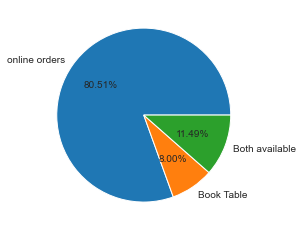

In [98]:
plt.pie(counts,labels = labels1,autopct = "%1.2f%%")
plt.show

# Top 5 Restaruants with highest votes

In [44]:
gb_name = cleaned_data.groupby("name")

In [45]:
top_votes = gb_name.sum().sort_values("votes",ascending=False).head(5)
top_votes["votes"]

name
Onesta               347520
Truffles             301059
Empire Restaurant    229808
Hammered             180602
The Black Pearl      172122
Name: votes, dtype: int64

In [46]:
top_votes_x = top_votes.index
top_votes_y = top_votes["votes"]

Text(0, 0.5, 'Votes')

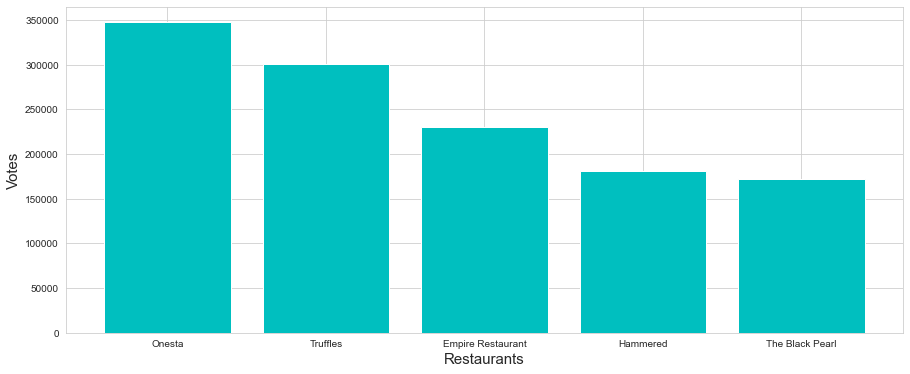

In [123]:
figure = plt.figure(figsize=(15,6))
plt.bar(top_votes_x,top_votes_y,color="c")
plt.xlabel("Restaurants",size=15)
plt.ylabel("Votes",size=15)

# 5 Restaurants with lowest votes

In [48]:
gb_name["votes"].sum().sort_values(ascending=False).tail(5)

name
Mirchi- The Indian Street Food Kitchen    0
Mist N Creams                             0
Mithai Ghar                               0
Mitran Da Adda                            0
sCoolMeal                                 0
Name: votes, dtype: int64

# Top 5  most expensive restaurants 

In [49]:
exp_rest = cleaned_data.sort_values("approx_cost(for two people)",ascending=False)
top_expensive_rest = exp_rest.drop_duplicates(subset="name").head(5)
top_expensive_rest

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),Per of good reviews,Per of bad reviews,Per of decent reviews
45618,Le Cirque Signature - The Leela Palace,No,Yes,4.3,128,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000.0,Dine-out,Old Airport Road,100.0,0.0,0.0
40266,Royal Afghan - ITC Windsor,No,Yes,4.3,413,Sankey Road,Fine Dining,"Dal Bukhara, Chocolate Cake, Butter Chicken, N...","North Indian, Mughlai",5000.0,Dine-out,Malleshwaram,100.0,0.0,0.0
41591,Malties - Radisson Blu,No,No,4.3,53,Marathahalli,Lounge,"Cocktails, Jumbo Prawns, Charcuterie Platter, ...","Continental, Fast Food",4500.0,Dine-out,Marathahalli,75.0,0.0,25.0
39125,La Brasserie - Le Meridien,No,Yes,4.1,309,Sankey Road,Fine Dining,"Pasta, Veg Sushi, Biryani, Lunch Buffet, Waffl...","North Indian, Continental, Japanese, Chinese, ...",4100.0,Dine-out,Lavelle Road,66.7,8.3,25.0
12677,Riwaz - The Ritz-Carlton,No,Yes,4.1,270,Residency Road,"Fine Dining, Bar","Tandoori Broccoli, Dal Makhani, Tamatar Ka Sho...",North Indian,4000.0,Dine-out,Church Street,66.7,33.3,0.0


In [50]:
x_axis_expensive  = top_expensive_rest["name"]
x_cost = top_expensive_rest["approx_cost(for two people)"]
y_axis_exp1 = top_expensive_rest["Per of good reviews"]
y_axis_exp2 = top_expensive_rest["Per of bad reviews"]
y_axis_exp3 = top_expensive_rest["Per of decent reviews"]
bar_y_axis_exp = top_expensive_rest["rate"]


Text(0, 0.5, 'Approx Cost for 2 persons')

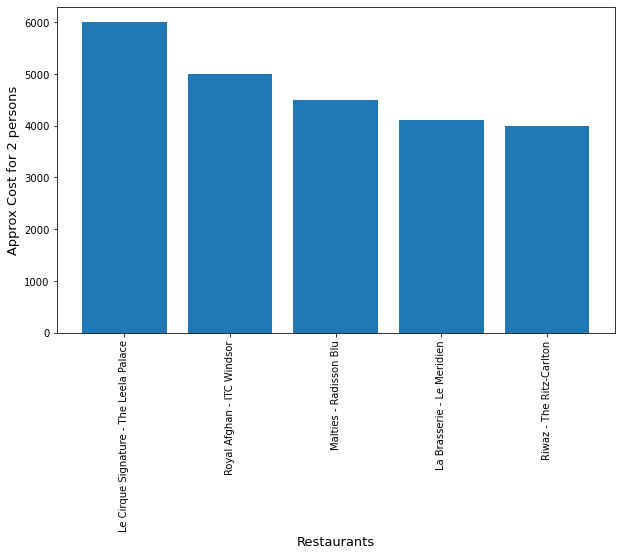

In [51]:
figure = plt.figure(figsize=(10,6))
plt.xticks (rotation=90)
plt.bar(x_axis_expensive,x_cost)
plt.xlabel("Restaurants",size=13)
plt.ylabel("Approx Cost for 2 persons",size=13)

Text(0.5, 1.0, 'Rating of Top 5 expensive restaurants')

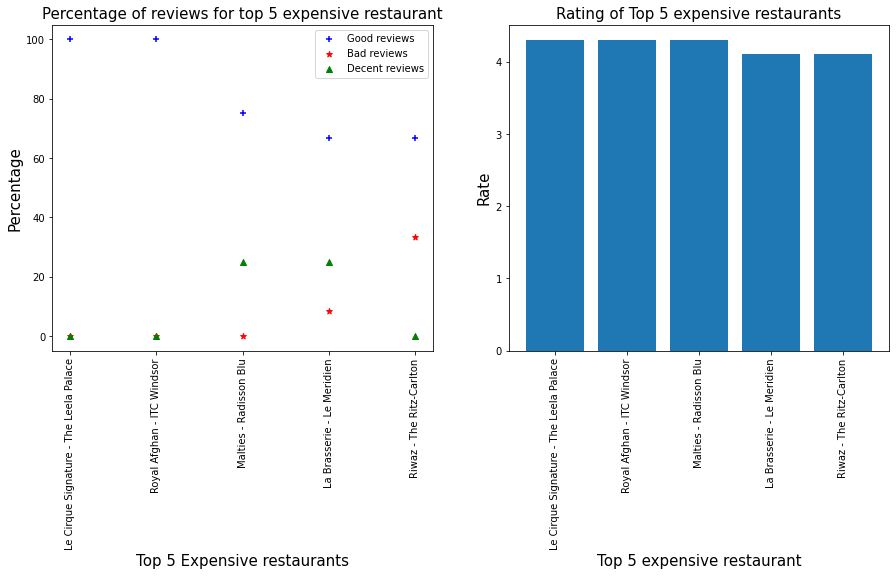

In [52]:
figure = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.xticks (rotation=90)
plt.scatter(x_axis_expensive,y_axis_exp1,color = "b",marker="+")
plt.scatter(x_axis_expensive,y_axis_exp2,color = "r",marker="*")
plt.scatter(x_axis_expensive,y_axis_exp3,color = "g",marker="^")
plt.xlabel("Top 5 Expensive restaurants",size=15)
plt.ylabel("Percentage",size=15)
plt.title("Percentage of reviews for top 5 expensive restaurant",size=15)
plt.legend(["Good reviews","Bad reviews","Decent reviews"])

plt.subplot(1,2,2)
plt.xticks (rotation=90)
plt.bar(x_axis_expensive,bar_y_axis_exp)
plt.xlabel("Top 5 expensive restaurant",size=15)
plt.ylabel("Rate",size=15)
plt.title("Rating of Top 5 expensive restaurants",size=15)

# Top 5 cheapest restaurants

In [53]:
cheap_rest = cleaned_data.sort_values("approx_cost(for two people)",ascending=True)
top_cheap_rest = cheap_rest.drop_duplicates(subset="name").head(5)
top_cheap_rest

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),Per of good reviews,Per of bad reviews,Per of decent reviews
32485,Srinidhi Sagar,Yes,No,3.9,162,Old Airport Road,Quick Bites,"Masala Dosa, Rava Dosa, Rava Idli, Filter Coff...","South Indian, North Indian, Chinese",40.0,Delivery,Koramangala 6th Block,50.0,0.0,50.0
14819,Srinidhi Sagar Food Line,Yes,No,3.7,131,Indiranagar,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40.0,Delivery,Frazer Town,66.7,33.3,0.0
29785,Srinidhi Sagar Deluxe,Yes,No,3.6,108,Domlur,Quick Bites,"Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...","South Indian, North Indian, Chinese",40.0,Delivery,Koramangala 5th Block,33.3,0.0,66.7
1892,Bread & Better,No,No,3.7,0,Bannerghatta Road,Bakery,Data not available,"Bakery, Fast Food",50.0,Desserts,Bannerghatta Road,100.0,0.0,0.0
14621,Savera Cafe,No,No,3.7,11,Shivajinagar,Cafe,Data not available,Cafe,50.0,Cafes,Frazer Town,75.0,0.0,25.0


In [54]:
x_axis_cheapest  = top_cheap_rest["name"]
y_cheap_cost = top_cheap_rest["approx_cost(for two people)"]
y_axis1 = top_cheap_rest["Per of good reviews"]
y_axis2 = top_cheap_rest["Per of bad reviews"]
y_axis3 = top_cheap_rest["Per of decent reviews"]
bar_y_axis = top_cheap_rest["rate"]

Text(0, 0.5, 'Approx cost for 2 persons')

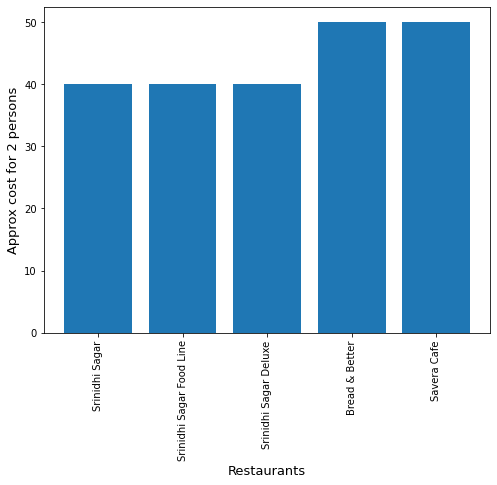

In [55]:
figure=plt.figure(figsize=(8,6))
plt.xticks (rotation=90)
plt.bar(x_axis_cheapest,y_cheap_cost)
plt.xlabel("Restaurants",size=13)
plt.ylabel("Approx cost for 2 persons",size=13)

Text(0.5, 1.0, 'Rating of Top 5 cheapest restaurants')

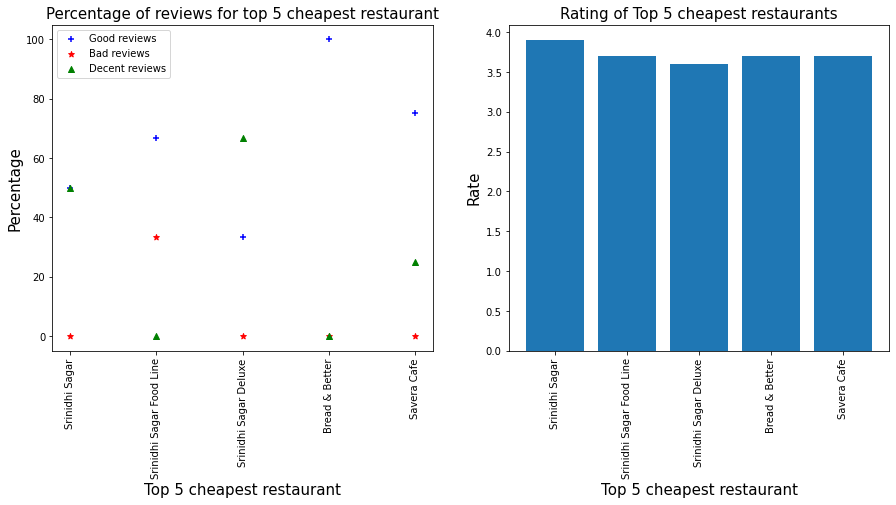

In [56]:
figure = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.xticks (rotation=90)
plt.scatter(x_axis_cheapest,y_axis1,color = "b",marker="+")
plt.scatter(x_axis_cheapest,y_axis2,color = "r",marker="*")
plt.scatter(x_axis_cheapest,y_axis3,color = "g",marker="^")
plt.xlabel("Top 5 cheapest restaurant",size=15)
plt.ylabel("Percentage",size=15)
plt.title("Percentage of reviews for top 5 cheapest restaurant",size=15)
plt.legend(["Good reviews","Bad reviews","Decent reviews"])

plt.subplot(1,2,2)
plt.xticks (rotation=90)
plt.bar(x_axis_cheapest,bar_y_axis)
plt.xlabel("Top 5 cheapest restaurant",size=15)
plt.ylabel("Rate",size=15)
plt.title("Rating of Top 5 cheapest restaurants",size=15)

# Restaurants grouped on the basis of restaurant type

In [57]:
gr_listed_in =  cleaned_data.groupby("listed_in(type)")

In [58]:
rest_gr_type = gr_listed_in.count()
rest_gr_type["name"]

listed_in(type)
Buffet                  881
Cafes                  1723
Delivery              25888
Desserts               3593
Dine-out              17763
Drinks & nightlife     1101
Pubs and bars           696
Name: name, dtype: int64

In [59]:
x_axis_type=rest_gr_type.index
y_axis_type=rest_gr_type["name"]

Text(0.5, 1.0, 'Number of Restaurants in each type')

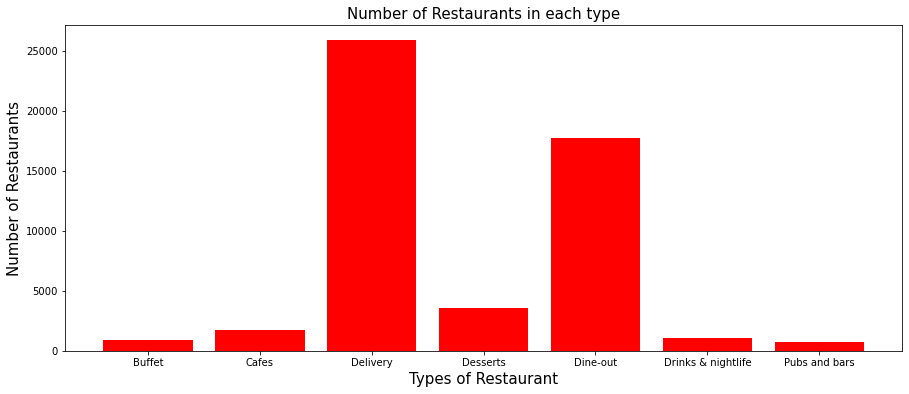

In [60]:
figure=plt.figure(figsize=(15,6))
plt.bar(x_axis_type,y_axis_type,color="red")
plt.xlabel("Types of Restaurant",size=15)
plt.ylabel("Number of Restaurants",size=15)
plt.title("Number of Restaurants in each type",size=15)

# Restaurants that have highest rating in each type

In [61]:
high_rate = gr_listed_in[["name","rate"]].max()
high_rate

,name,rate
listed_in(type),,
Buffet,b CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,4.9
Cafes,iSpice Resto Cafe,4.7
Delivery,sCoolMeal,4.9
Desserts,iFruit Live Ice Creams,4.9
Dine-out,repEAT Hub,4.9
Drinks & nightlife,i-Bar - The Park Bangalore,4.9
Pubs and bars,re:cess - Hilton Bangalore Embassy GolfLinks,4.9


In [62]:
x_high_rate = high_rate.index
y_high_rate = high_rate["rate"]

Text(0, 0.5, 'Rate')

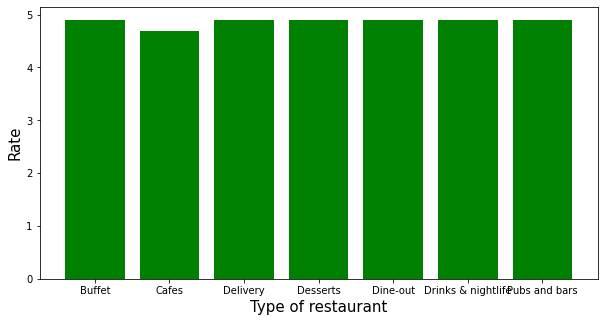

In [63]:
figure = plt.figure(figsize=(10,5))
plt.bar(x_high_rate,y_high_rate,color="g")
plt.xlabel("Type of restaurant",size=15)
plt.ylabel("Rate",size=15)

#  Restaurants that have lowest rating in each type

In [64]:
low_rate = gr_listed_in[["name","rate"]].min()
low_rate

,name,rate
listed_in(type),,
Buffet,#Vibes Restro,2.3
Cafes,#refuel,2.3
Delivery,#FeelTheROLL,2.0
Desserts,1 Fahreheit,2.4
Dine-out,#L-81 Cafe,1.8
Drinks & nightlife,1131 Bar + Kitchen,2.0
Pubs and bars,1131 Bar + Kitchen,2.4


In [65]:
x_low_rate = low_rate.index
y_low_rate = low_rate["rate"]

Text(0, 0.5, 'Rate')

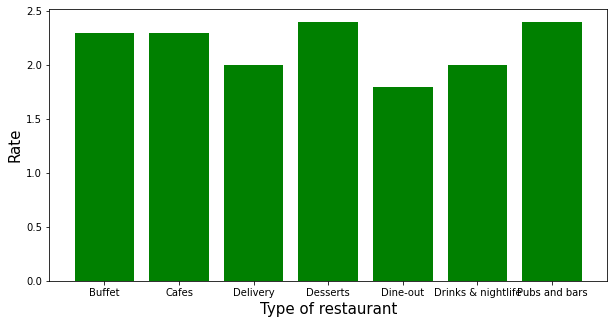

In [66]:
figure = plt.figure(figsize=(10,5))
plt.bar(x_low_rate,y_low_rate,color="g")
plt.xlabel("Type of restaurant",size=15)
plt.ylabel("Rate",size=15)

# Most expensive restaurants in each type

In [67]:
most_exp_res = gr_listed_in[["name","approx_cost(for two people)"]].max()
most_exp_res

,name,approx_cost(for two people)
listed_in(type),,
Buffet,b CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,4100.0
Cafes,iSpice Resto Cafe,2500.0
Delivery,sCoolMeal,3000.0
Desserts,iFruit Live Ice Creams,2200.0
Dine-out,repEAT Hub,6000.0
Drinks & nightlife,i-Bar - The Park Bangalore,4500.0
Pubs and bars,re:cess - Hilton Bangalore Embassy GolfLinks,4000.0


In [107]:
x_most_exp_res = most_exp_res.index
y_most_exp_res = most_exp_res["approx_cost(for two people)"]


Text(0.5, 1.0, 'Most expensive restaurants in each type')

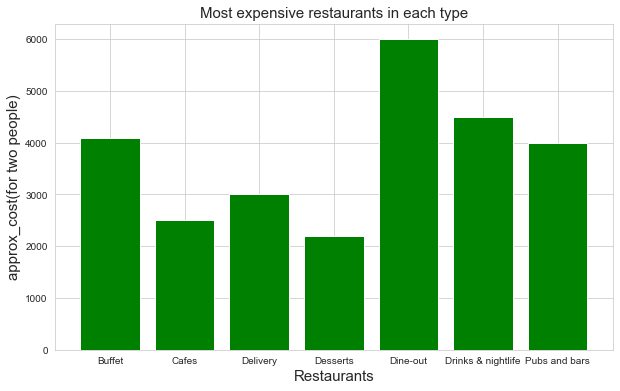

In [126]:
figure = plt.figure(figsize=(10,6))
plt.bar(x_most_exp_res,y_most_exp_res,color="g")
plt.xlabel("Restaurants",size=15)
plt.ylabel("approx_cost(for two people)",size=15)
plt.title("Most expensive restaurants in each type",size=15)

# Cheapest restaurants in each type

In [101]:
cheap_rest_type = gr_listed_in[["name","approx_cost(for two people)"]].min()
cheap_rest_type

,name,approx_cost(for two people)
listed_in(type),,
Buffet,#Vibes Restro,300.0
Cafes,#refuel,50.0
Delivery,#FeelTheROLL,40.0
Desserts,1 Fahreheit,50.0
Dine-out,#L-81 Cafe,40.0
Drinks & nightlife,1131 Bar + Kitchen,150.0
Pubs and bars,1131 Bar + Kitchen,150.0


In [102]:
x_cheap_rest_type = cheap_rest_type["name"]
y_cheap_rest_type = cheap_rest_type["approx_cost(for two people)"]

Text(0.5, 1.0, ' Cheapest restaurants in each type')

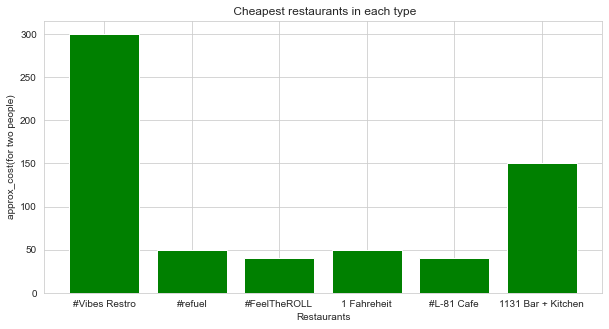

In [127]:
figure= plt.figure(figsize=(10,5))
plt.bar(x_cheap_rest_type,y_cheap_rest_type,color="g")
plt.xlabel("Restaurants")
plt.ylabel("approx_cost(for two people)")
plt.title(" Cheapest restaurants in each type")

# Restaurants with highest rating for each type of cuisines

In [71]:
gr_cuisines = cleaned_data.groupby("cuisines")

In [72]:
gr_cuisines[["name","rate"]].max()

,name,rate
cuisines,,
"African, Burger",Galito's,4.6
"African, Burger, Desserts, Beverages, Fast Food",Galito's,4.6
American,Vimmi's Cafe,4.2
"American, Asian, Continental, North Indian, South Indian, Chinese",Tapout Tavern,4.1
"American, Asian, European, North Indian",Monkey Bar,4.3
...,...,...
"Turkish, Fast Food, Biryani, Chinese",Zu's Doner Kebaps,3.7
"Turkish, Rolls",Tarbouche,4.1
Vietnamese,Vietnamese Kitchen,4.4


# Restaurants with lowest rating for each type of cuisines

In [73]:
gr_cuisines[["name","rate"]].min()

,name,rate
cuisines,,
"African, Burger",Galito's,4.5
"African, Burger, Desserts, Beverages, Fast Food",Galito's,4.6
American,Mayo N Burger,2.7
"American, Asian, Continental, North Indian, South Indian, Chinese",Tapout Tavern,4.1
"American, Asian, European, North Indian",Monkey Bar,4.3
...,...,...
"Turkish, Fast Food, Biryani, Chinese",Zu's Doner Kebaps,3.7
"Turkish, Rolls",Tarbouche,3.7
Vietnamese,Blue Ginger - The Taj West End,3.1


# Function to fetch name of restaurants for a specific cousine

In [74]:
cusine_data = cleaned_data.copy()
cusine_data.drop_duplicates(subset="name",inplace=True)

In [75]:
cusine=input("Enter which cusine do u want to search: ") # Here i wanted restaurants that serve Chinese cuisine so i have 
def find_cusine(data):                                   # entered "Chinese" as input
    global cusine
    if cusine in data:
        return ("Present")
    else:
        return("Absent")

Enter which cusine do u want to search: Chinese


In [76]:
# all Restaurants that have Chinese  in there cuisines are extracted

cusine_data["check"]= cusine_data["cuisines"].apply(find_cusine)
cusine_data[cusine_data["check"]=="Present"].sort_values("rate",ascending=False) # shorting based on highest rate 

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),Per of good reviews,Per of bad reviews,Per of decent reviews,check
8275,Asia Kitchen By Mainland China,Yes,Yes,4.9,2178,Koramangala 5th Block,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos",1500.0,Buffet,BTM,85.3,2.7,12.1,Present
13367,The Big Barbeque,No,Yes,4.7,524,Electronic City,Casual Dining,"Panipuri, Chaat, Jalebi, Paan Kulfi, Paan Shot...","BBQ, North Indian, Continental, Chinese",1500.0,Buffet,Electronic City,93.3,0.0,6.7,Present
7885,Biergarten,No,Yes,4.7,6865,Whitefield,"Microbrewery, Pub","Wheat Beer, Risotto, Craft Beer, Caesar Salad,...","Continental, European, BBQ, Chinese, Asian",2400.0,Dine-out,Brookefield,82.9,4.6,12.4,Present
7094,You Mee,Yes,No,4.7,231,Whitefield,Casual Dining,"Ramen, Sushi Bar, Pork Dumplings, Prawn, Maki ...","Sushi, Japanese, Chinese, Thai",2000.0,Delivery,Brookefield,98.0,0.0,2.0,Present
10882,ECHOES Koramangala,No,No,4.7,3197,Koramangala 5th Block,"Cafe, Casual Dining","Pasta, Momos, Mezze Platter, Pizza, Waffles, C...","Chinese, American, Continental, Italian, North...",750.0,Dine-out,BTM,89.7,1.8,8.5,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39797,Vande Matharam,Yes,No,2.3,178,Rajajinagar,Casual Dining,"Coffee, Dal Makhani","North Indian, Chinese, South Indian, Street Food",500.0,Delivery,Malleshwaram,100.0,0.0,0.0,Present
1570,Tandoor Hut,No,No,2.2,90,Bannerghatta Road,Casual Dining,"Noodles, Tandoori Chicken","North Indian, Chinese",750.0,Delivery,Bannerghatta Road,1.0,91.8,7.2,Present
7492,Bageecha,Yes,No,2.2,479,Marathahalli,Casual Dining,"Schezwan Chicken, Butter Chicken, Beer, Onion ...","North Indian, Chinese",650.0,Delivery,Brookefield,0.0,0.0,100.0,Present
5586,Midnight Hunger Solutions 24/7,Yes,No,2.1,252,Indiranagar,Delivery,"Mutton Biryani, Chilli Paneer, Chicken Biryani","North Indian, Mughlai, Chinese",500.0,Delivery,Brigade Road,35.4,52.3,12.3,Present


# Top 5 Locations that have highest number of restaurants

In [77]:
rest_gb_loc = cleaned_data.groupby("location")["name"].count()
rest_gb_loc.sort_values(ascending=False).head(5)

location
BTM                      5109
HSR                      2522
Koramangala 5th Block    2503
JP Nagar                 2234
Whitefield               2141
Name: name, dtype: int64

In [78]:
import folium

In [79]:
from branca.element import Figure

In [80]:
fig = Figure(width=550,height=350)
m2 = folium.Map(location=[12.9716,77.5946],zoom_start=11)
fig.add_child(m2)

folium.Marker(location=[12.9166,77.6101],popup='5109 Restaurants present in BTW').add_to(m2)
folium.Marker(location=[12.9121,77.6446],popup='2522 Restaurants present in Hsr').add_to(m2)
folium.Marker(location=[12.9352,77.6245],popup='2503 Restaurants present in Koramangala 5th Block').add_to(m2)
folium.Marker(location=[12.9063,77.5857],popup='2234 Restaurants present in JP Nagar').add_to(m2)
folium.Marker(location=[12.9698,77.7500],popup='2141 Restaurants present in Whitefield').add_to(m2)

m2

# Highest rated restaurant in each location

In [124]:
gr_by_loc_high_rate = cleaned_data.groupby("location")
gr_by_loc_high_rate[["name","rate"]].max()

,name,rate
location,,
BTM,sCoolMeal,4.9
Banashankari,Yo Roll Corner,4.7
Banaswadi,Zam Zam Restaurant,4.4
Bannerghatta Road,Zhangs Classic,4.6
Basavanagudi,Zephyr,4.8
...,...,...
Whitefield,nu.tree,4.9
Wilson Garden,Vijaya Sagar,4.0
Yelahanka,Twist N Roll,3.9


# Lowest rated  restaurants in each location

In [132]:
gr_by_loc_high_rate[["name","rate"]].min()

,name,rate
location,,
BTM,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,2.4
Banashankari,1947,2.5
Banaswadi,29 Degrees North,2.3
Bannerghatta Road,#refuel,2.2
Basavanagudi,1980s Games Cafe,2.5
...,...,...
Whitefield,4700BC Popcorn,2.4
Wilson Garden,3 Spice,3.0
Yelahanka,Cheta's Kitchen,3.4


# Most expensive restaurants in each location

In [135]:
gr_by_loc_high_rate[["name","approx_cost(for two people)"]].max()

,name,approx_cost(for two people)
location,,
BTM,sCoolMeal,1600.0
Banashankari,Yo Roll Corner,1300.0
Banaswadi,Zam Zam Restaurant,1300.0
Bannerghatta Road,Zhangs Classic,1700.0
Basavanagudi,Zephyr,2200.0
...,...,...
Whitefield,nu.tree,3000.0
Wilson Garden,Vijaya Sagar,1000.0
Yelahanka,Twist N Roll,555.0


# Cheapest restaurants in each location

In [136]:
gr_by_loc_high_rate[["name","approx_cost(for two people)"]].min()

,name,approx_cost(for two people)
location,,
BTM,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,70.0
Banashankari,1947,80.0
Banaswadi,29 Degrees North,100.0
Bannerghatta Road,#refuel,50.0
Basavanagudi,1980s Games Cafe,100.0
...,...,...
Whitefield,4700BC Popcorn,100.0
Wilson Garden,3 Spice,100.0
Yelahanka,Cheta's Kitchen,250.0


# Number of restaurants present in each city

In [81]:
city = zomato_data.copy()

In [82]:
city.drop_duplicates(subset=["address","name"],inplace=True)

In [83]:
group_by_city = city.groupby("listed_in(city)")

In [84]:
rest_each_city = group_by_city.count()
rest_each_city["name"]

listed_in(city)
BTM                      1456
Banashankari              600
Bannerghatta Road        1079
Basavanagudi              392
Bellandur                 794
Brigade Road             1049
Brookefield               992
Church Street             103
Electronic City           733
Frazer Town               277
HSR                       466
Indiranagar               764
JP Nagar                   86
Jayanagar                 142
Kalyan Nagar              729
Kammanahalli               40
Koramangala 4th Block     282
Koramangala 5th Block      20
Koramangala 6th Block      25
Koramangala 7th Block      28
Lavelle Road              128
MG Road                    13
Malleshwaram              701
Marathahalli              359
New BEL Road              323
Old Airport Road           67
Rajajinagar               264
Residency Road              9
Sarjapur Road             101
Whitefield                477
Name: name, dtype: int64

In [85]:
x_axis_city = rest_each_city.index
y_axis_city = rest_each_city["name"]

Text(0.5, 1.0, 'Total Number of Restaurants in each city')

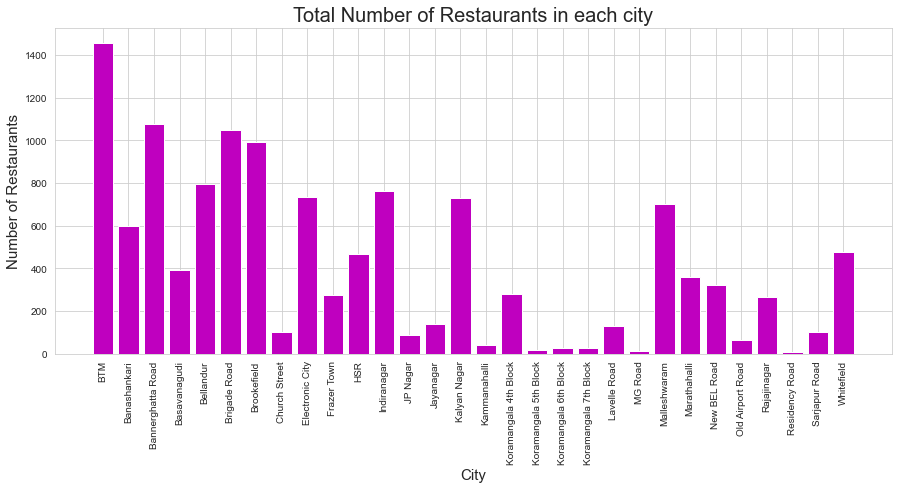

In [96]:
figure=plt.figure(figsize=(15,6))
plt.xticks (rotation=90)
sns.set_style(style="whitegrid")
plt.bar(x_axis_city,y_axis_city,color="m")
plt.xlabel("City",size=15)
plt.ylabel("Number of Restaurants",size=15)
plt.title("Total Number of Restaurants in each city",size=20)


# Highest Rated restaurant in each city

In [125]:
gr_by_city= cleaned_data.groupby("listed_in(city)")
gr_by_city[["name","rate"]].max()

,name,rate
listed_in(city),,
BTM,sCoolMeal,4.9
Banashankari,Zephyr,4.7
Bannerghatta Road,eat.fit,4.7
Basavanagudi,eat.fit,4.8
Bellandur,nu.tree,4.9
Brigade Road,i-Bar - The Park Bangalore,4.9
Brookefield,nu.tree,4.9
Church Street,i-Bar - The Park Bangalore,4.9
Electronic City,nu.tree,4.7


# Lowest Rated restaurants in each city

In [131]:
gr_by_city[["name","rate"]].min()

,name,rate
listed_in(city),,
BTM,#L-81 Cafe,2.2
Banashankari,1947,2.5
Bannerghatta Road,#refuel,2.2
Basavanagudi,1441 Pizzeria,2.5
Bellandur,#FeelTheROLL,2.1
Brigade Road,1Q1,1.8
Brookefield,9 Bowls,2.1
Church Street,1Q1,1.8
Electronic City,#Vibes Restro,2.4


# Most expensive  restaurant in each city

In [129]:
gr_city[["name","approx_cost(for two people)"]].max()

,name,approx_cost(for two people)
listed_in(city),,
BTM,sCoolMeal,2500.0
Banashankari,Zephyr,1500.0
Bannerghatta Road,eat.fit,1700.0
Basavanagudi,eat.fit,2200.0
Bellandur,nu.tree,2500.0
Brigade Road,i-Bar - The Park Bangalore,4000.0
Brookefield,nu.tree,3000.0
Church Street,i-Bar - The Park Bangalore,4000.0
Electronic City,nu.tree,3000.0


# Cheapest restaurant in each city

In [130]:
gr_city[["name","approx_cost(for two people)"]].min()

,name,approx_cost(for two people)
listed_in(city),,
BTM,#L-81 Cafe,70.0
Banashankari,1947,80.0
Bannerghatta Road,#refuel,50.0
Basavanagudi,1441 Pizzeria,100.0
Bellandur,#FeelTheROLL,100.0
Brigade Road,1Q1,40.0
Brookefield,9 Bowls,100.0
Church Street,1Q1,40.0
Electronic City,#Vibes Restro,60.0


# Number of Restaurants grouped on the basis of rating

In [87]:
group_by_rate = cleaned_data.groupby("rate")

In [88]:
gr_by_rate = group_by_rate.count()
gr_by_rate["name"]

rate
1.8        5
2.0       11
2.1       24
2.2       26
2.3       51
2.4       70
2.5      101
2.6      260
2.7      307
2.8      600
2.9      802
3.0     1022
3.1     1561
3.2     1867
3.3     2305
3.4     2472
3.5     2781
3.6     3312
3.7    13839
3.8     3870
3.9     3968
4.0     3182
4.1     2944
4.2     2183
4.3     1691
4.4     1147
4.5      656
4.6      300
4.7      167
4.8       66
4.9       55
Name: name, dtype: int64

In [89]:
x_axis_rate = gr_by_rate.index
y_axis_rate = gr_by_rate["name"]

Text(0, 0.5, 'Count')

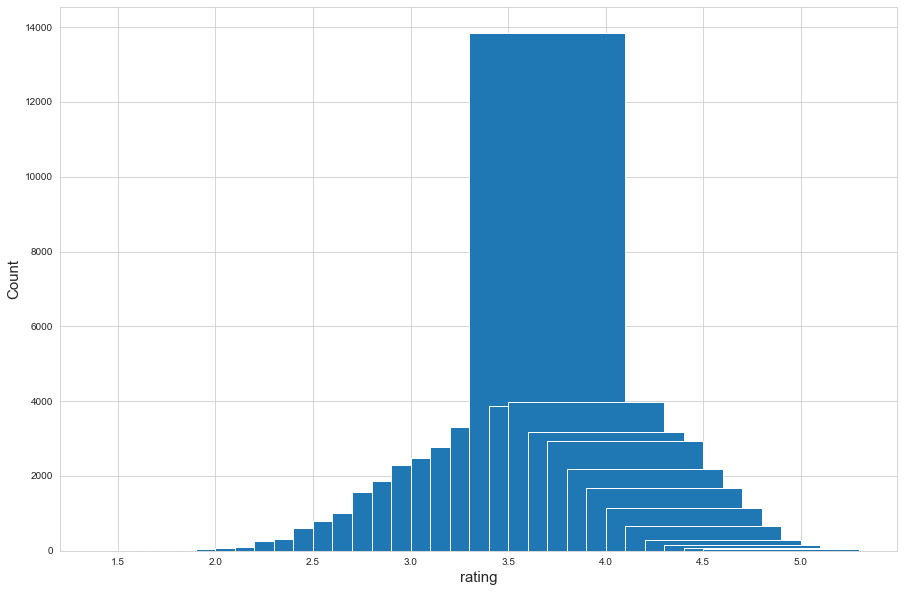

In [90]:
figure =  plt.figure(figsize=(15,10))
plt.bar(x_axis_rate,y_axis_rate)
plt.xlabel("rating",size=15)
plt.ylabel("Count",size=15)

# Restaurants that have 100% good reviews

In [94]:
cleaned_data[cleaned_data["Per of good reviews"] == 100]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),Per of good reviews,Per of bad reviews,Per of decent reviews
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,Data not available,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet,Banashankari,100.0,0.0,0.0
19,360 Atoms Restaurant And Cafe,Yes,No,3.1,13,Banashankari,Cafe,Data not available,"Cafe, Chinese, Continental, Italian",400.0,Cafes,Banashankari,100.0,0.0,0.0
23,My Tea House,Yes,No,3.6,62,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600.0,Cafes,Banashankari,100.0,0.0,0.0
27,Sea Green Cafe,No,No,3.3,4,Banashankari,Cafe,Data not available,"Cafe, Fast Food, Beverages",500.0,Cafes,Banashankari,100.0,0.0,0.0
29,Srinathji's Cafe,No,No,3.8,148,Basavanagudi,"Casual Dining, Cafe","Paratha, Sandwich, Chilli Idli, Noodles, Sandw...","North Indian, Cafe, Chinese, Fast Food",550.0,Cafes,Banashankari,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51698,Kava Kitchen & Bar - Fairfield by Marriott,No,No,3.9,74,Whitefield,"Casual Dining, Bar",Dal Halwa,"North Indian, South Indian, Continental, Ameri...",1200.0,Pubs and bars,Whitefield,100.0,0.0,0.0
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,Pubs and bars,Whitefield,100.0,0.0,0.0
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar",Data not available,"North Indian, Continental",800.0,Pubs and bars,Whitefield,100.0,0.0,0.0
51710,Topsy Turvey,No,No,3.7,0,Whitefield,Bar,Data not available,Finger Food,900.0,Pubs and bars,Whitefield,100.0,0.0,0.0


# Restaurants that have 100% bad reviews

In [95]:
cleaned_data[cleaned_data["Per of bad reviews"] == 100]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),Per of good reviews,Per of bad reviews,Per of decent reviews
16,Catch-up-ino,Yes,No,3.9,133,Banashankari,Cafe,"Momos, Mushroom Bruschettas, Jalapeno Cheeseba...","Cafe, Fast Food, Continental, Chinese, Momos",800.0,Cafes,Banashankari,0.0,100.0,0.0
50,Petoo,No,No,3.7,21,Banashankari,Quick Bites,Data not available,North Indian,450.0,Delivery,Banashankari,0.0,100.0,0.0
90,Me And My Cake,No,No,3.7,0,Banashankari,Delivery,Data not available,"Bakery, Desserts",500.0,Delivery,Banashankari,0.0,100.0,0.0
110,Hari Super Sandwich,No,No,3.7,0,Banashankari,"Takeaway, Delivery",Data not available,"Sandwich, Pizza, Beverages",200.0,Delivery,Banashankari,0.0,100.0,0.0
114,Cake Bite,No,No,3.7,0,Banashankari,Bakery,Data not available,Bakery,300.0,Delivery,Banashankari,0.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51554,Biryani & Kabab,No,No,3.2,4,Whitefield,Quick Bites,Data not available,Biryani,150.0,Dine-out,Whitefield,0.0,100.0,0.0
51580,New Taj Darbar,No,No,3.1,6,Whitefield,Quick Bites,Data not available,"South Indian, Chinese, North Indian",300.0,Dine-out,Whitefield,0.0,100.0,0.0
51599,Momo Time,Yes,No,3.7,0,Whitefield,Quick Bites,Data not available,"Momos, Chinese",300.0,Dine-out,Whitefield,0.0,100.0,0.0
51602,Indian Aroma Cafe,Yes,No,2.8,84,Whitefield,Quick Bites,Data not available,"North Indian, Chinese",300.0,Dine-out,Whitefield,0.0,100.0,0.0
